In [1]:
import pandas as pd
import numpy as np

In [2]:
data_token = pd.read_csv('data_token.csv', )
data_token

,article,label
0,"['의료', '물품', '비축', '제도', '신설', '기금', '등', '재원'...",0
1,"['의료', '물품', '비축', '제도', '신설', '인도', '지원', '최대...",0
2,"['아세안', '특별', '화상', '정상', '회의', '채택', '대통령', '...",0
3,"['문재인', '대통령', '오후', '청와대', '본관', '집무실', '코로나'...",0
4,"['차명진', '후보', '연합뉴스', '법원', '결정', '총선', '하루', ...",0
...,...,...
91,"['영구', '임대', '국민임대', '행복', '주택', '단순화', '통합', ...",1
92,"['동영상', '뉴스', '글로벌', '경제', '위기', '각국', '중앙은행',...",1
93,"['금통위', '친', '정부', '인사', '대거', '포진', '은', '쪽',...",1
94,"['사진', '이미지', '투데이', '국제', '유가', '최저', '기록', '...",1


### 기사 평균 단어 수 

In [81]:

total = 0
for i in range(data_token.shape[0]):
    total += len(data_token['article'][i])
    
print(total/data_token.shape[0])
        

2008.1875


In [3]:
data1_token = pd.read_csv('data1_token.csv', )

In [207]:
data1_token.tail()

,article,label
43,"['정부', '싱크탱크', '한국', '개발', '연구원', '신종', '코로나바이...",1
44,"['재산세', '과표', '합산', '액', '금융', '소득', '이상', '가구...",1
45,"['소득', '하위', '이하', '대상', '인', '가구', '기준', '최대'...",1
46,"['주택', '공급', '관', '규칙', '개정안', '시행', '투기', '지구...",1
47,"['서울', '시내', '아파트', '밀집', '지역', '사진', '뉴스', '청...",1


## train, test 데이터 만들기

In [4]:
train_data = data_token['article']
train_label = data_token['label']

In [5]:
test_data = data1_token['article']
test_label = data1_token['label']

In [6]:
from keras import preprocessing 
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


## X_train one-hot encoding

In [163]:
tokenizer = preprocessing.text.Tokenizer(num_words=500) 
tokenizer.fit_on_texts(train_data)
X_train = tokenizer.texts_to_matrix(train_data, mode='binary') 
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [50]:
X_train.shape

(96, 1000)

## X_test one-hot encoding

In [164]:
tokenizer = preprocessing.text.Tokenizer(num_words=500) 
tokenizer.fit_on_texts(test_data)
X_test = tokenizer.texts_to_matrix(test_data, mode='binary') 
X_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## y_train, y_test array로 변환

In [10]:
y_train = np.asarray(train_label).astype('float32')

In [11]:
y_test = np.asarray(test_label).astype('float32')

## modeling

In [82]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import os

In [248]:
from keras import models
from keras import layers

# from keras import optimizers  
# optimizers.RMSprop(lr=0.001)

model = models.Sequential()
## 주요 단어 500개로 one-hot encoding -> input_shape 수 500개
model.add(layers.Dense(16, activation='relu', input_shape=(500,)) )
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid' ))

model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    shuffle= True,
                    batch_size=15,
                    validation_split=0.25)

Train on 72 samples, validate on 24 samples
Epoch 1/10
72/72 [==============================] - 1s 8ms/step - loss: 0.8325 - accuracy: 0.2500 - val_loss: 0.5963 - val_accuracy: 0.7500
Epoch 2/10
72/72 [==============================] - 0s 208us/step - loss: 0.6997 - accuracy: 0.2639 - val_loss: 0.5964 - val_accuracy: 0.7500
Epoch 3/10
72/72 [==============================] - 0s 208us/step - loss: 0.6508 - accuracy: 0.5278 - val_loss: 0.6020 - val_accuracy: 0.8333
Epoch 4/10
72/72 [==============================] - 0s 222us/step - loss: 0.6098 - accuracy: 0.6944 - val_loss: 0.5846 - val_accuracy: 0.8750
Epoch 5/10
72/72 [==============================] - 0s 194us/step - loss: 0.5649 - accuracy: 0.8194 - val_loss: 0.5861 - val_accuracy: 0.8750
Epoch 6/10
72/72 [==============================] - 0s 222us/step - loss: 0.5226 - accuracy: 0.9722 - val_loss: 0.5594 - val_accuracy: 0.9583
Epoch 7/10
72/72 [==============================] - 0s 194us/step - loss: 0.4834 - accuracy: 0.9861 - val_

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [14]:
import matplotlib.pyplot as plt

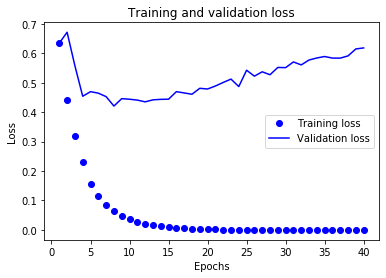

In [247]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

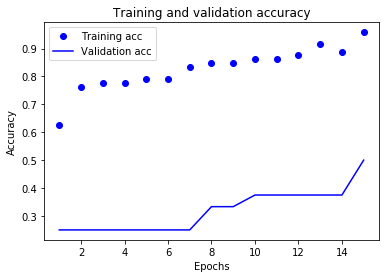

In [240]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy'][:15] # epochs 수랑 맞추기 위해서
val_acc = history_dict['val_accuracy'][:15]

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [249]:
model.predict(X_test)

array([[0.3596135 ],
       [0.32930952],
       [0.32925802],
       [0.38240156],
       [0.46728125],
       [0.44276622],
       [0.41447887],
       [0.45353952],
       [0.56673443],
       [0.5014783 ],
       [0.41793808],
       [0.6355379 ],
       [0.44577488],
       [0.32279164],
       [0.40207535],
       [0.546078  ],
       [0.36238873],
       [0.39311537],
       [0.37836516],
       [0.4783416 ],
       [0.3994213 ],
       [0.49562734],
       [0.46202528],
       [0.44877273],
       [0.4880881 ],
       [0.48187926],
       [0.43530184],
       [0.45950562],
       [0.5552534 ],
       [0.48907304],
       [0.4526846 ],
       [0.42372105],
       [0.42210856],
       [0.41531208],
       [0.72506696],
       [0.62838936],
       [0.6883235 ],
       [0.6090985 ],
       [0.46682656],
       [0.58511615],
       [0.47139692],
       [0.4663511 ],
       [0.3468785 ],
       [0.5479964 ],
       [0.5495923 ],
       [0.5297257 ],
       [0.50265104],
       [0.692

In [251]:
pred = model.predict(X_test)
count = 0

# 0 = 정치, 1= 경제
for i in range(len(pred)):
    if pred[i] < 0.5 :
        if y_test[i] == 0 :
            print('예측 값 : {}, 분류 예측 : {}, 정답 : {}'.format(pred[i], '정치', '정치' ))
            count += 1
        else: 
            print('예측 값 : {}, 분류 예측 : {}, 정답 : {}'.format(pred[i], '정치', '경제' ))
    if pred[i] > 0.5 :
        if y_test[i] == 0 :
            print('예측 값 : {}, 분류 예측 : {}, 정답 : {}'.format(pred[i], '경제', '정치' ))
        else: 
            print('예측 값 : {}, 분류 예측 : {}, 정답 : {}'.format(pred[i], '경제', '경제' ))
            count += 1
    
print('정답 갯수 : {}, 총 갯수 : {} '.format(count, len(pred)))
               
    

예측 값 : [0.3596135], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.32930952], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.32925802], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.38240156], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.46728125], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.44276622], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.41447887], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.45353952], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.56673443], 분류 예측 : 경제, 정답 : 정치
예측 값 : [0.5014783], 분류 예측 : 경제, 정답 : 정치
예측 값 : [0.41793808], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.6355379], 분류 예측 : 경제, 정답 : 정치
예측 값 : [0.44577488], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.32279164], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.40207535], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.546078], 분류 예측 : 경제, 정답 : 정치
예측 값 : [0.36238873], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.39311537], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.37836516], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.4783416], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.3994213], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.49562734], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.46202528], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.44877273], 분류 예측 : 정치, 정답 : 정치
예측 값 : [0.4880881], 분류 